# EDA com R

Nesse caderno será feito um exemplo de Análise Exploratória de Dados usando a linguagem R.

Os passos da EDA seguirão os seguinte artigos do Towards Data Science:
* https://towardsdatascience.com/exploratory-data-analysis-in-r-for-beginners-fe031add7072
* https://towardsdatascience.com/exploratory-data-analysis-in-r-for-beginners-part-2-5bfd35fc9781

Lembrando que EDA é o processo de analisar e visualizar os dados para obter um melhor compreendimento dos mesmos. Os passos mais comuns de uma EDA são:
1. Importar os dados
2. Limpar os dados
3. Processar os dados
4. Visualizar os dados

A EDA será realizada sobre o dataset de dados do PISA que pode ser encontrado no seguinte link: https://www.kaggle.com/datasets/zazueta/pisa-scores-2015?select=Pisa+mean+perfromance+scores+2013+-+2015+Data.csv

As principais ferramentas do R usadas nesse projeto serão:
* **tidyverse** - Que é um pacote guarda chuva que consolifa diversas ferramentas do R usadas durante o ciclo de ciência de dados, como o ggplot2, dplyr, etc.
* **ggplot2** - Biblioteca do R usada para criar gráficos de maneira declarativa e simples.
* **corrplot** - Pacote usado para cálculo de correlação.
* Algumas outras funções básicas para manipulação de dados, como o `strsplit()`, `cbind()` e outros.

Não se esqueça, EDA não é sobre fazer gráficos, mas sim sobre fazer gráficos informativos.

## 1 - Importando os dados

In [8]:
url <- "https://raw.githubusercontent.com/WLAraujo/r_eda/main/eda_pisa/Pisa%20mean%20perfromance%20scores%202013%20-%202015%20Data.csv"
download.file(url, destfile="pisa_mean_performances.csv", method="curl")

In [9]:
# Lendo o csv do meu github
# Veja que a importação que estamos fazendo considera um encoding específico e a substituição de valores vazios por NA
df.raw <- read.csv(file ='pisa_mean_performances.csv', fileEncoding="UTF-8-BOM", na.strings = '..')

In [10]:
head(df)

                                              
1 function (x, df1, df2, ncp, log = FALSE)    
2 {                                           
3     if (missing(ncp))                       
4         .Call(C_df, x, df1, df2, log)       
5     else .Call(C_dnf, x, df1, df2, ncp, log)
6 }                                           

In [11]:
# Visualizando os dados importados
df.raw

Country.Name,Country.Code,Series.Name,Series.Code,X2013..YR2013.,X2014..YR2014.,X2015..YR2015.
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<dbl>
Albania,ALB,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,NA,NA,413.1570
Albania,ALB,PISA: Mean performance on the mathematics scale. Female,LO.PISA.MAT.FE,NA,NA,417.7500
Albania,ALB,PISA: Mean performance on the mathematics scale. Male,LO.PISA.MAT.MA,NA,NA,408.5455
Albania,ALB,PISA: Mean performance on the reading scale,LO.PISA.REA,NA,NA,405.2588
Albania,ALB,PISA: Mean performance on the reading scale. Female,LO.PISA.REA.FE,NA,NA,434.6396
Albania,ALB,PISA: Mean performance on the reading scale. Male,LO.PISA.REA.MA,NA,NA,375.7592
Albania,ALB,PISA: Mean performance on the science scale,LO.PISA.SCI,NA,NA,427.2250
Albania,ALB,PISA: Mean performance on the science scale. Female,LO.PISA.SCI.FE,NA,NA,439.4430
Albania,ALB,PISA: Mean performance on the science scale. Male,LO.PISA.SCI.MA,NA,NA,414.9576


## 2 - Limpando os dados

In [12]:
# Para primeiro importar o tidyverse
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [13]:
# Primeiro passo da limpeza: Selecionar somente colunas relevantes
df <- df.raw[1:1161, c(1,4,7)]
df

,Country.Name,Series.Code,X2015..YR2015.
,<chr>,<chr>,<dbl>
1,Albania,LO.PISA.MAT,413.1570
2,Albania,LO.PISA.MAT.FE,417.7500
3,Albania,LO.PISA.MAT.MA,408.5455
4,Albania,LO.PISA.REA,405.2588
5,Albania,LO.PISA.REA.FE,434.6396
6,Albania,LO.PISA.REA.MA,375.7592
7,Albania,LO.PISA.SCI,427.2250
8,Albania,LO.PISA.SCI.FE,439.4430
9,Albania,LO.PISA.SCI.MA,414.9576


In [14]:
# Usando a função spread para criar uma coluna para cada código de avaliação
# Assim, temos apenas uma linha para cada país
df <- spread(df, key=Series.Code, value=X2015..YR2015.)
df

Country.Name,LO.PISA.MAT,LO.PISA.MAT.FE,LO.PISA.MAT.MA,LO.PISA.REA,LO.PISA.REA.FE,LO.PISA.REA.MA,LO.PISA.SCI,LO.PISA.SCI.FE,LO.PISA.SCI.MA
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,413.1570,417.7500,408.5455,405.2588,434.6396,375.7592,427.2250,439.4430,414.9576
Algeria,359.6062,363.0725,356.4951,349.8593,366.2082,335.1854,375.7451,383.2209,369.0352
Argentina,409.0333,400.4431,418.3884,425.3031,432.9581,416.9666,432.2262,424.9944,440.1020
Armenia,NA,NA,NA,NA,NA,NA,NA,NA,NA
Australia,493.8962,490.9855,496.7613,502.9006,518.8658,487.1855,509.9939,508.9216,511.0493
Austria,496.7423,483.1330,510.0982,484.8656,495.0752,474.8460,495.0375,485.5268,504.3712
Azerbaijan,NA,NA,NA,NA,NA,NA,NA,NA,NA
Bahrain,NA,NA,NA,NA,NA,NA,NA,NA,NA
Belgium,506.9844,499.7390,514.0026,498.5242,506.6386,490.6642,501.9997,496.0319,507.7805


In [15]:
# Renomeando as colunas de código para algo mais inteligível
df <- rename(df, Maths = LO.PISA.MAT, Maths.F = LO.PISA.MAT.FE, Maths.M = LO.PISA.MAT.MA,
            Reading = LO.PISA.REA, Reading.F = LO.PISA.REA.FE, Reading.M = LO.PISA.REA.MA,
            Science = LO.PISA.SCI, Science.F = LO.PISA.SCI.FE, Science.M = LO.PISA.SCI.MA)
df

Country.Name,Maths,Maths.F,Maths.M,Reading,Reading.F,Reading.M,Science,Science.F,Science.M
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,413.1570,417.7500,408.5455,405.2588,434.6396,375.7592,427.2250,439.4430,414.9576
Algeria,359.6062,363.0725,356.4951,349.8593,366.2082,335.1854,375.7451,383.2209,369.0352
Argentina,409.0333,400.4431,418.3884,425.3031,432.9581,416.9666,432.2262,424.9944,440.1020
Armenia,NA,NA,NA,NA,NA,NA,NA,NA,NA
Australia,493.8962,490.9855,496.7613,502.9006,518.8658,487.1855,509.9939,508.9216,511.0493
Austria,496.7423,483.1330,510.0982,484.8656,495.0752,474.8460,495.0375,485.5268,504.3712
Azerbaijan,NA,NA,NA,NA,NA,NA,NA,NA,NA
Bahrain,NA,NA,NA,NA,NA,NA,NA,NA,NA
Belgium,506.9844,499.7390,514.0026,498.5242,506.6386,490.6642,501.9997,496.0319,507.7805


In [16]:
# Por fim vamos dropar as linhas com valores NA
df <- drop_na(df)
df

Country.Name,Maths,Maths.F,Maths.M,Reading,Reading.F,Reading.M,Science,Science.F,Science.M
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,413.1570,417.7500,408.5455,405.2588,434.6396,375.7592,427.2250,439.4430,414.9576
Algeria,359.6062,363.0725,356.4951,349.8593,366.2082,335.1854,375.7451,383.2209,369.0352
Argentina,409.0333,400.4431,418.3884,425.3031,432.9581,416.9666,432.2262,424.9944,440.1020
Australia,493.8962,490.9855,496.7613,502.9006,518.8658,487.1855,509.9939,508.9216,511.0493
Austria,496.7423,483.1330,510.0982,484.8656,495.0752,474.8460,495.0375,485.5268,504.3712
Belgium,506.9844,499.7390,514.0026,498.5242,506.6386,490.6642,501.9997,496.0319,507.7805
Brazil,377.0695,369.5493,385.0406,407.3486,418.5617,395.4633,400.6821,398.7000,402.7830
Bulgaria,441.1899,442.1631,440.3189,431.7175,456.5986,409.4498,445.7720,453.9011,438.4966
Canada,515.6474,511.1417,520.1661,526.6678,539.7624,513.5355,527.7047,527.1562,528.2548


In [17]:
# Só por fim de curiosidades, poderiamos realizar todas essas operações de uma vez usando o operador pipe (%>%)
# O operador pipe pega o que estiver a sua esquerda e usa como primeiro argumento da função à direita
df <- df.raw[1:1161, c(1, 4, 7)] %>%
      spread(key=Series.Code, value=X2015..YR2015.) %>% 
      rename(Maths = LO.PISA.MAT, Maths.F = LO.PISA.MAT.FE, Maths.M = LO.PISA.MAT.MA,
              Reading = LO.PISA.REA, Reading.F = LO.PISA.REA.FE, Reading.M = LO.PISA.REA.MA,
              Science = LO.PISA.SCI, Science.F = LO.PISA.SCI.FE, Science.M = LO.PISA.SCI.MA) %>% 
      drop_na()
df

Country.Name,Maths,Maths.F,Maths.M,Reading,Reading.F,Reading.M,Science,Science.F,Science.M
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,413.1570,417.7500,408.5455,405.2588,434.6396,375.7592,427.2250,439.4430,414.9576
Algeria,359.6062,363.0725,356.4951,349.8593,366.2082,335.1854,375.7451,383.2209,369.0352
Argentina,409.0333,400.4431,418.3884,425.3031,432.9581,416.9666,432.2262,424.9944,440.1020
Australia,493.8962,490.9855,496.7613,502.9006,518.8658,487.1855,509.9939,508.9216,511.0493
Austria,496.7423,483.1330,510.0982,484.8656,495.0752,474.8460,495.0375,485.5268,504.3712
Belgium,506.9844,499.7390,514.0026,498.5242,506.6386,490.6642,501.9997,496.0319,507.7805
Brazil,377.0695,369.5493,385.0406,407.3486,418.5617,395.4633,400.6821,398.7000,402.7830
Bulgaria,441.1899,442.1631,440.3189,431.7175,456.5986,409.4498,445.7720,453.9011,438.4966
Canada,515.6474,511.1417,520.1661,526.6678,539.7624,513.5355,527.7047,527.1562,528.2548


## 3 - Visualizando os dados

In [18]:
# Instalando e importando a ggplot2
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 3.1 - Barplot

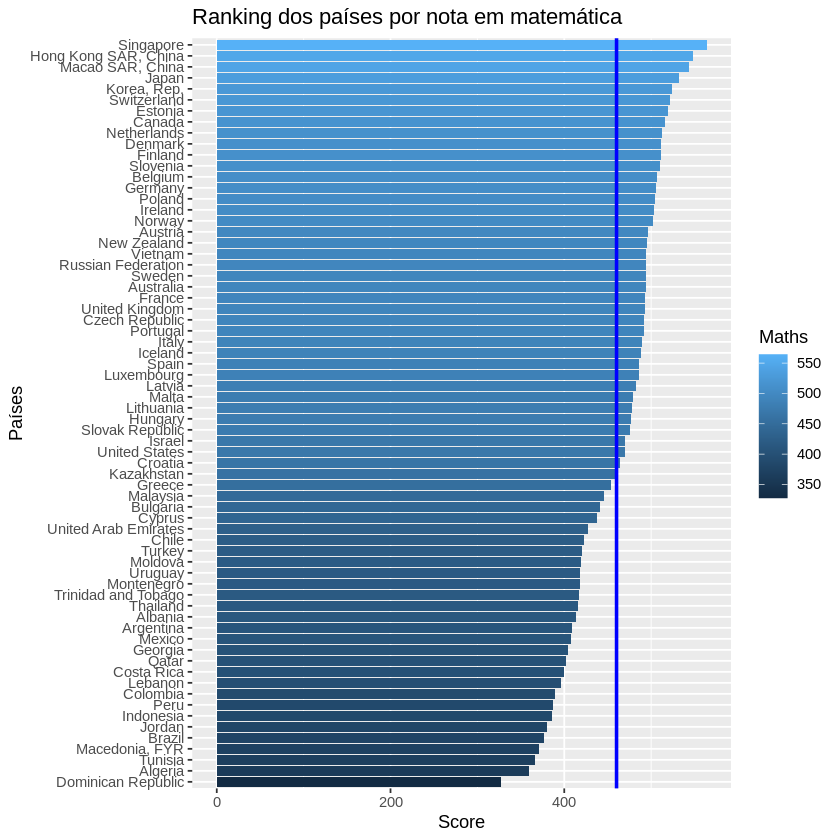

In [19]:
# Rankeando os scores de matemática por país
ggplot  (data=df, aes(x=reorder(Country.Name, Maths), y=Maths)) + # Define que queremos um gráfico onde o eixo x são os países e o y os scores de matemática
        geom_bar(stat ='identity',aes(fill=Maths)) + # Define o tipo de gráfico como barras e que o preenchimento é o score de matemática (identity indica que já temos os valores de y)
        coord_flip() + # Inverte os eixos do gráfico
        labs(title = 'Ranking dos países por nota em matemática', y='Score', x='Países') + # Adiciona os labels do gráfico
        geom_hline(yintercept = mean(df$Maths),size = 1, color = 'blue') # Adiciona linha de média ao gráfico

### 3.2 - Boxplot

In [20]:
# Agora, vamos fazer um boxplot, mas como o boxplot precisa de só duas colunas (categoria e valor) vamos ter que fazer um pivot de colunas em linhas
# Primeiro vamos definir as colunas
df2 = df[,c(1,3,4,6,7,9,10)]
df2

Country.Name,Maths.F,Maths.M,Reading.F,Reading.M,Science.F,Science.M
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,417.7500,408.5455,434.6396,375.7592,439.4430,414.9576
Algeria,363.0725,356.4951,366.2082,335.1854,383.2209,369.0352
Argentina,400.4431,418.3884,432.9581,416.9666,424.9944,440.1020
Australia,490.9855,496.7613,518.8658,487.1855,508.9216,511.0493
Austria,483.1330,510.0982,495.0752,474.8460,485.5268,504.3712
Belgium,499.7390,514.0026,506.6386,490.6642,496.0319,507.7805
Brazil,369.5493,385.0406,418.5617,395.4633,398.7000,402.7830
Bulgaria,442.1631,440.3189,456.5986,409.4498,453.9011,438.4966
Canada,511.1417,520.1661,539.7624,513.5355,527.1562,528.2548


In [21]:
# Realizando o pivoteamento
df2 <- pivot_longer(df2, c(2,3,4,5,6,7), names_to = 'Score')
df2

Country.Name,Score,value
<chr>,<chr>,<dbl>
Albania,Maths.F,417.7500
Albania,Maths.M,408.5455
Albania,Reading.F,434.6396
Albania,Reading.M,375.7592
Albania,Science.F,439.4430
Albania,Science.M,414.9576
Algeria,Maths.F,363.0725
Algeria,Maths.M,356.4951
Algeria,Reading.F,366.2082


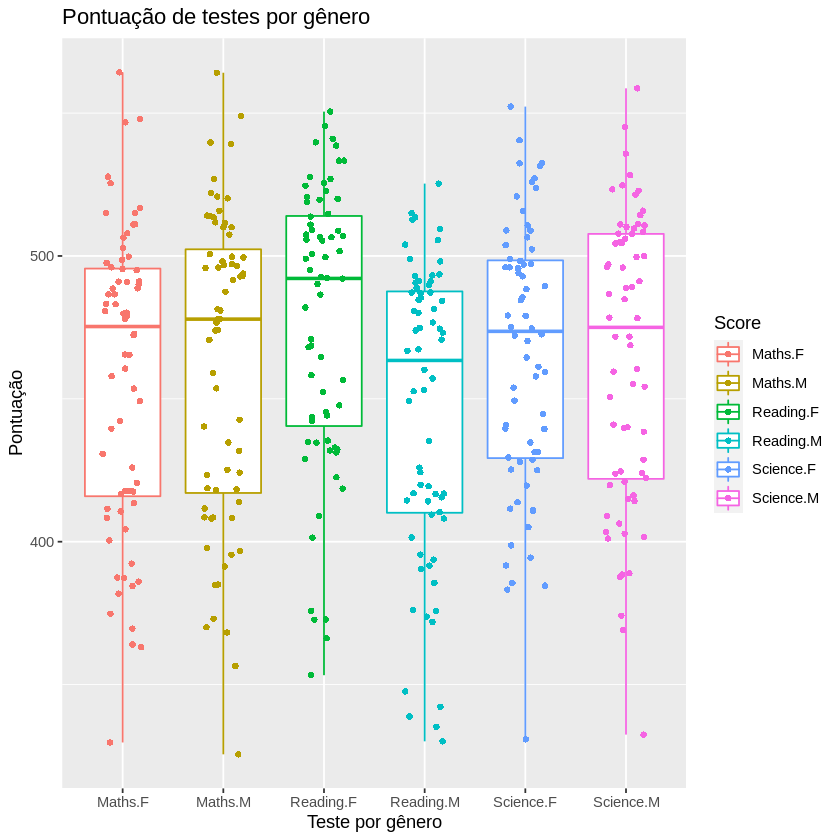

In [22]:
# Plotando gráfico boxplot
ggplot  (data = df2, aes(x=Score, y=value, color=Score)) + # Definindo os valores em x e y
        geom_boxplot() + # Definindo visualização como um boxplot
        geom_jitter(shape=16, position=position_jitter(0.2)) + # Adicionando distribuição dos pontos
        labs(title = 'Pontuação de testes por gênero', y='Pontuação', x='Teste por gênero') # Adicionando os labels

### 3.3 - Grid de gráficos

In [23]:
# Vamos criar um grid de gráficos para separar os boxplots por gênero
# Ou seja, vamos criar dois gráficos, cada um com três boxplots, um para cada matéria
# Para fazer isso com os dados que temos vamos separar as strings da coluna Score de df2
# Vamos começar criando um vetor vazio para armazenar duplas que vão conter gênero e teste
S = numeric(408)

In [24]:
# Para cada uma das linhas do df2 vamos aplicar a transformação
# Veja que a referência para realizar o split é o "."
for (i in 1:length(df2$Score)) {
  S[i] = strsplit(df2$Score[i],".",fixed = TRUE)
}
S

[[1]]
[1] "Maths" "F"    

[[2]]
[1] "Maths" "M"    

[[3]]
[1] "Reading" "F"      

[[4]]
[1] "Reading" "M"      

[[5]]
[1] "Science" "F"      

[[6]]
[1] "Science" "M"      

[[7]]
[1] "Maths" "F"    

[[8]]
[1] "Maths" "M"    

[[9]]
[1] "Reading" "F"      

[[10]]
[1] "Reading" "M"      

[[11]]
[1] "Science" "F"      

[[12]]
[1] "Science" "M"      

[[13]]
[1] "Maths" "F"    

[[14]]
[1] "Maths" "M"    

[[15]]
[1] "Reading" "F"      

[[16]]
[1] "Reading" "M"      

[[17]]
[1] "Science" "F"      

[[18]]
[1] "Science" "M"      

[[19]]
[1] "Maths" "F"    

[[20]]
[1] "Maths" "M"    

[[21]]
[1] "Reading" "F"      

[[22]]
[1] "Reading" "M"      

[[23]]
[1] "Science" "F"      

[[24]]
[1] "Science" "M"      

[[25]]
[1] "Maths" "F"    

[[26]]
[1] "Maths" "M"    

[[27]]
[1] "Reading" "F"      

[[28]]
[1] "Reading" "M"      

[[29]]
[1] "Science" "F"      

[[30]]
[1] "Science" "M"      

[[31]]
[1] "Maths" "F"    

[[32]]
[1] "Maths" "M"    

[[33]]
[1] "Reading" "F"      

[[34]]
[1] "Reading" "M"      

[[35]]
[1] "Science" "F"      

[[36]]
[1] "Science" "M"      

[[37]]
[1] "Maths" "F"    

[[38]]
[1] "Maths" "M"    

[[39]]
[1] "Reading" "F"      

[[40]]
[1] "Reading" "M"      

[[41]]
[1] "Science" "F"      

[[42]]
[1] "Science" "M"      

[[43]]
[1] "Maths" "F"    

[[44]]
[1] "Maths" "M"    

[[45]]
[1] "Reading" "F"      

[[46]]
[1] "Reading" "M"      

[[47]]
[1] "Science" "F"      

[[48]]
[1] "Science" "M"      

[[49]]
[1] "Maths" "F"    

[[50]]
[1] "Maths" "M"    

[[51]]
[1] "Reading" "F"      

[[52]]
[1] "Reading" "M"      

[[53]]
[1] "Science" "F"      

[[54]]
[1] "Science" "M"      

[[55]]
[1] "Maths" "F"    

[[56]]
[1] "Maths" "M"    

[[57]]
[1] "Reading" "F"      

[[58]]
[1] "Reading" "M"      

[[59]]
[1] "Science" "F"      

[[60]]
[1] "Science" "M"      

[[61]]
[1] "Maths" "F"    

[[62]]
[1] "Maths" "M"    

[[63]]
[1] "Reading" "F"      

[[64]]
[1] "Reading" "M"      

[[65]]
[1] "Science" "F"      

[[66]]
[1] "Science" "M"      

[[67]]
[1] "Maths" "F"    

[[68]]
[1] "Maths" "M"    

[[69]]
[1] "Reading" "F"      

[[70]]
[1] "Reading" "M"      

[[71]]
[1] "Science" "F"      

[[72]]
[1] "Science" "M"      

[[73]]
[1] "Maths" "F"    

[[74]]
[1] "Maths" "M"    

[[75]]
[1] "Reading" "F"      

[[76]]
[1] "Reading" "M"      

[[77]]
[1] "Science" "F"      

[[78]]
[1] "Science" "M"      

[[79]]
[1] "Maths" "F"    

[[80]]
[1] "Maths" "M"    

[[81]]
[1] "Reading" "F"      

[[82]]
[1] "Reading" "M"      

[[83]]
[1] "Science" "F"      

[[84]]
[1] "Science" "M"      

[[85]]
[1] "Maths" "F"    

[[86]]
[1] "Maths" "M"    

[[87]]
[1] "Reading" "F"      

[[88]]
[1] "Reading" "M"      

[[89]]
[1] "Science" "F"      

[[90]]
[1] "Science" "M"      

[[91]]
[1] "Maths" "F"    

[[92]]
[1] "Maths" "M"    

[[93]]
[1] "Reading" "F"      

[[94]]
[1] "Reading" "M"      

[[95]]
[1] "Science" "F"      

[[96]]
[1] "Science" "M"      

[[97]]
[1] "Maths" "F"    

[[98]]
[1] "Maths" "M"    

[[99]]
[1] "Reading" "F"      

[[100]]
[1] "Reading" "M"      

[[101]]
[1] "Science" "F"      

[[102]]
[1] "Science" "M"      

[[103]]
[1] "Maths" "F"    

[[104]]
[1] "Maths" "M"    

[[105]]
[1] "Reading" "F"      

[[106]]
[1] "Reading" "M"      

[[107]]
[1] "Science" "F"      

[[108]]
[1] "Science" "M"      

[[109]]
[1] "Maths" "F"    

[[110]]
[1] "Maths" "M"    

[[111]]
[1] "Reading" "F"      

[[112]]
[1] "Reading" "M"      

[[113]]
[1] "Science" "F"      

[[114]]
[1] "Science" "M"      

[[115]]
[1] "Maths" "F"    

[[116]]
[1] "Maths" "M"    

[[117]]
[1] "Reading" "F"      

[[118]]
[1] "Reading" "M"      

[[119]]
[1] "Science" "F"      

[[120]]
[1] "Science" "M"      

[[121]]
[1] "Maths" "F"    

[[122]]
[1] "Maths" "M"    

[[123]]
[1] "Reading" "F"      

[[124]]
[1] "Reading" "M"      

[[125]]
[1] "Science" "F"      

[[126]]
[1] "Science" "M"      

[[127]]
[1] "Maths" "F"    

[[128]]
[1] "Maths" "M"    

[[129]]
[1] "Reading" "F"      

[[130]]
[1] "Reading" "M"  

In [25]:
# Com essa nova lista podemos transformar S em um dataframe com duas colunas
# Para fazer isso vamos usar o unlist (vetorização) em conjunto com o matrix (Criação de matrix)
df3 <- S %>% unlist() %>% matrix(ncol = 2, byrow = TRUE)
df3

Maths,F
Maths,M
Reading,F
Reading,M
Science,F
Science,M
Maths,F
Maths,M
Reading,F
Reading,M
Science,F


In [26]:
# Com nossa nova matriz podemos usar o simples comando de transformar em matriz
df3 <- as.data.frame(df3)
df3

V1,V2
<chr>,<chr>
Maths,F
Maths,M
Reading,F
Reading,M
Science,F
Science,M
Maths,F
Maths,M
Reading,F


In [27]:
# Veja que agora temos em df3 um dataframe com 2 colunas (v1 e v2)
# Vamos combinar df2 com df3 para gerar tabela completa
df4 = cbind(df2, df3)
colnames(df4) = c('Country','Score','Value','Test','Gender')
df4

Country,Score,Value,Test,Gender
<chr>,<chr>,<dbl>,<chr>,<chr>
Albania,Maths.F,417.7500,Maths,F
Albania,Maths.M,408.5455,Maths,M
Albania,Reading.F,434.6396,Reading,F
Albania,Reading.M,375.7592,Reading,M
Albania,Science.F,439.4430,Science,F
Albania,Science.M,414.9576,Science,M
Algeria,Maths.F,363.0725,Maths,F
Algeria,Maths.M,356.4951,Maths,M
Algeria,Reading.F,366.2082,Reading,F


Warning message in pal_name(palette, type):
“Unknown palette Green”


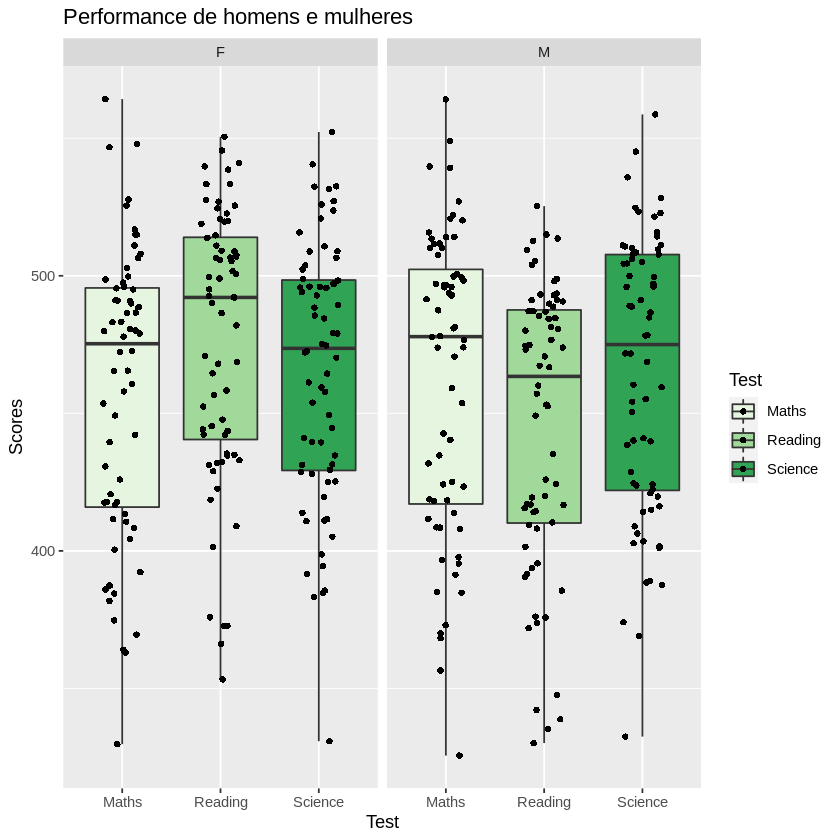

In [28]:
# Criando plots múltiplos
ggplot  (data = df4, aes(x=Test,y=Value, fill=Test)) + # Definindo eixos x-y e o esquema de coloração como fill
        geom_boxplot()+ # Definindo que o gráfico será um boxplot
        scale_fill_brewer(palette="Green") + # Escala de cores do fill
        geom_jitter(shape=16, position=position_jitter(0.2)) + # Definindo como será a distribuição de pontos do boxplot
        labs(title = 'Performance de homens e mulheres', y='Scores', x='Test') + # Adicionando os labels
        facet_wrap(~Gender,nrow = 1) # Definindo separação em 2 gráficos com base na coluna gender

### 3.4 - Usando função mutate para calcular diferenças

In [29]:
# Vamos criar novas colunas no nosso dataframe para mostrar a diferença entre homens e mulheres
# Para isso vamos usar a função mutate do dplyr, que serve justamente para criar/alterar colunas
df = mutate(df, 
            Maths.Diff = ((Maths.M - Maths.F)/Maths.F)*100, # Adicionando coluna para matemática
            Reading.Diff = ((Reading.M - Reading.F)/Reading.F)*100, # Adicionando coluna para leitura
            Science.Diff = ((Science.M - Science.F)/Science.F)*100, # Adicionando coluna para ciências
            Total.Score = Maths + Reading + Science, # Soma das difereências
            Avg.Diff = (Maths.Diff+Reading.Diff+Science.Diff)/3) # Diferença média
df

Country.Name,Maths,Maths.F,Maths.M,Reading,Reading.F,Reading.M,Science,Science.F,Science.M,Maths.Diff,Reading.Diff,Science.Diff,Total.Score,Avg.Diff
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,413.1570,417.7500,408.5455,405.2588,434.6396,375.7592,427.2250,439.4430,414.9576,-2.20336807,-13.546953,-5.5718993,1245.641,-7.1074068
Algeria,359.6062,363.0725,356.4951,349.8593,366.2082,335.1854,375.7451,383.2209,369.0352,-1.81158688,-8.471338,-3.7017041,1085.211,-4.6615429
Argentina,409.0333,400.4431,418.3884,425.3031,432.9581,416.9666,432.2262,424.9944,440.1020,4.48134681,-3.693538,3.5547951,1266.563,1.4475345
Australia,493.8962,490.9855,496.7613,502.9006,518.8658,487.1855,509.9939,508.9216,511.0493,1.17637774,-6.105678,0.4180624,1506.791,-1.5037459
Austria,496.7423,483.1330,510.0982,484.8656,495.0752,474.8460,495.0375,485.5268,504.3712,5.58131786,-4.086078,3.8812368,1476.645,1.7921588
Belgium,506.9844,499.7390,514.0026,498.5242,506.6386,490.6642,501.9997,496.0319,507.7805,2.85419970,-3.153025,2.3685191,1507.508,0.6898979
Brazil,377.0695,369.5493,385.0406,407.3486,418.5617,395.4633,400.6821,398.7000,402.7830,4.19193941,-5.518524,1.0240879,1185.100,-0.1008323
Bulgaria,441.1899,442.1631,440.3189,431.7175,456.5986,409.4498,445.7720,453.9011,438.4966,-0.41708128,-10.326091,-3.3937938,1318.679,-4.7123219
Canada,515.6474,511.1417,520.1661,526.6678,539.7624,513.5355,527.7047,527.1562,528.2548,1.76553766,-4.858977,0.2083976,1570.020,-0.9616804


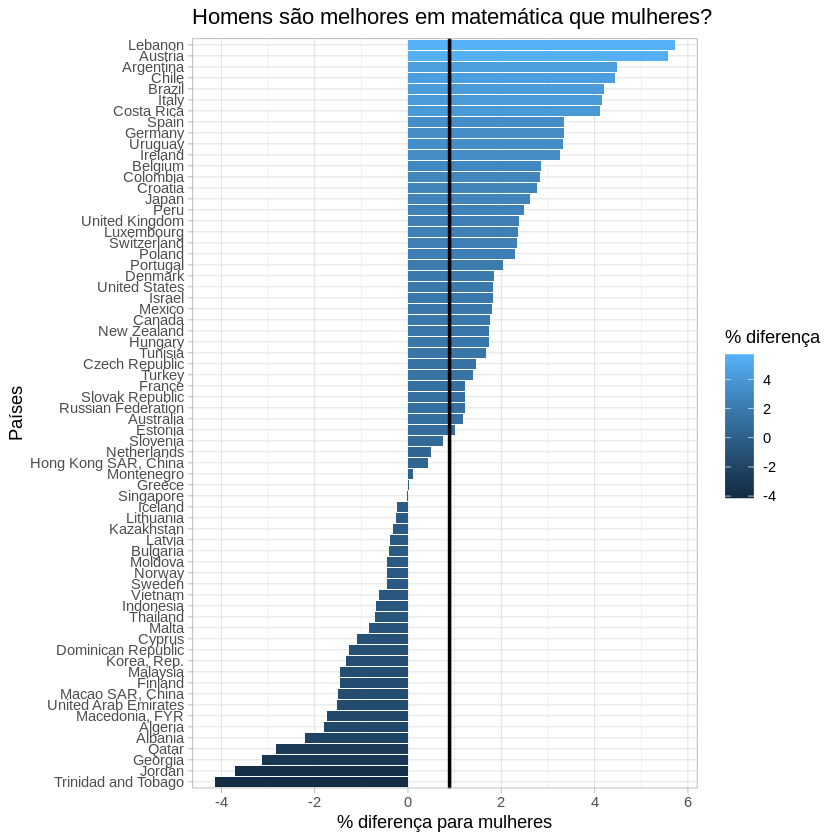

In [30]:
# Vamos usar um barplot para visualizar melhor a diferença nos scores de matemática
ggplot  (data=df, aes(x=reorder(Country.Name, Maths.Diff), y=Maths.Diff)) +
        geom_bar(stat ='identity',aes(fill=Maths.Diff)) + 
        coord_flip() + 
        theme_light() +
        labs(title = 'Homens são melhores em matemática que mulheres?', y='% diferença para mulheres', x='Países') +
        geom_hline(yintercept = mean(df$Maths.Diff),size = 1, color = 'black') +
        scale_fill_gradient(name="% diferença")

### 3.5 - Plot de correlação

In [31]:
 # Vamos criar um plot que evidencie a correlação entre difentes informações
 # Aqui vamos tentar relacionar as notas de homens e mulheres em diferentes áreas
 # Vamos começar criando um dataset somente com as colunas de interesse
 df6 = df[,c(1,3,4,6,7,9,10)]
 df6

Country.Name,Maths.F,Maths.M,Reading.F,Reading.M,Science.F,Science.M
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,417.7500,408.5455,434.6396,375.7592,439.4430,414.9576
Algeria,363.0725,356.4951,366.2082,335.1854,383.2209,369.0352
Argentina,400.4431,418.3884,432.9581,416.9666,424.9944,440.1020
Australia,490.9855,496.7613,518.8658,487.1855,508.9216,511.0493
Austria,483.1330,510.0982,495.0752,474.8460,485.5268,504.3712
Belgium,499.7390,514.0026,506.6386,490.6642,496.0319,507.7805
Brazil,369.5493,385.0406,418.5617,395.4633,398.7000,402.7830
Bulgaria,442.1631,440.3189,456.5986,409.4498,453.9011,438.4966
Canada,511.1417,520.1661,539.7624,513.5355,527.1562,528.2548


In [32]:
# Usando função de correlação
# Vamos considerar todas as colunas do dataframe menos a primeira
m_corr = cor(df6[,-1])
m_corr

,Maths.F,Maths.M,Reading.F,Reading.M,Science.F,Science.M
Maths.F,1.0000000,0.9845874,0.9377498,0.9177645,0.9711420,0.9547097
Maths.M,0.9845874,1.0000000,0.9312678,0.9468078,0.9576479,0.9758210
Reading.F,0.9377498,0.9312678,1.0000000,0.9663211,0.9555957,0.9440488
Reading.M,0.9177645,0.9468078,0.9663211,1.0000000,0.9283812,0.9692920
Science.F,0.9711420,0.9576479,0.9555957,0.9283812,1.0000000,0.9736539
Science.M,0.9547097,0.9758210,0.9440488,0.9692920,0.9736539,1.0000000


In [33]:
# Para verificar se as correlações são relevantes vamos calcular o p delas
# Primeiro temos que instalar o pacote de miscelâneas de teste de hipótese
install.packages("Hmisc")
library("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [34]:
# Agora podemos calcular a matriz de p valores
m_r <- rcorr(as.matrix(df6[,-1]))
m_r

          Maths.F Maths.M Reading.F Reading.M Science.F Science.M
Maths.F      1.00    0.98      0.94      0.92      0.97      0.95
Maths.M      0.98    1.00      0.93      0.95      0.96      0.98
Reading.F    0.94    0.93      1.00      0.97      0.96      0.94
Reading.M    0.92    0.95      0.97      1.00      0.93      0.97
Science.F    0.97    0.96      0.96      0.93      1.00      0.97
Science.M    0.95    0.98      0.94      0.97      0.97      1.00

n= 68 


P
          Maths.F Maths.M Reading.F Reading.M Science.F Science.M
Maths.F            0       0         0         0         0       
Maths.M    0               0         0         0         0       
Reading.F  0       0                 0         0         0       
Reading.M  0       0       0                   0         0       
Science.F  0       0       0         0                   0       
Science.M  0       0       0         0         0                 

In [35]:
# Veja que os valores de p apresentados foram muito pequenos, logo existe boa correlação entre as variáveis
# Para finalizar essa parte da EDA vamos plotar um mapa de correlações
# Precisamos intalar o pacote de plot de correlação
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



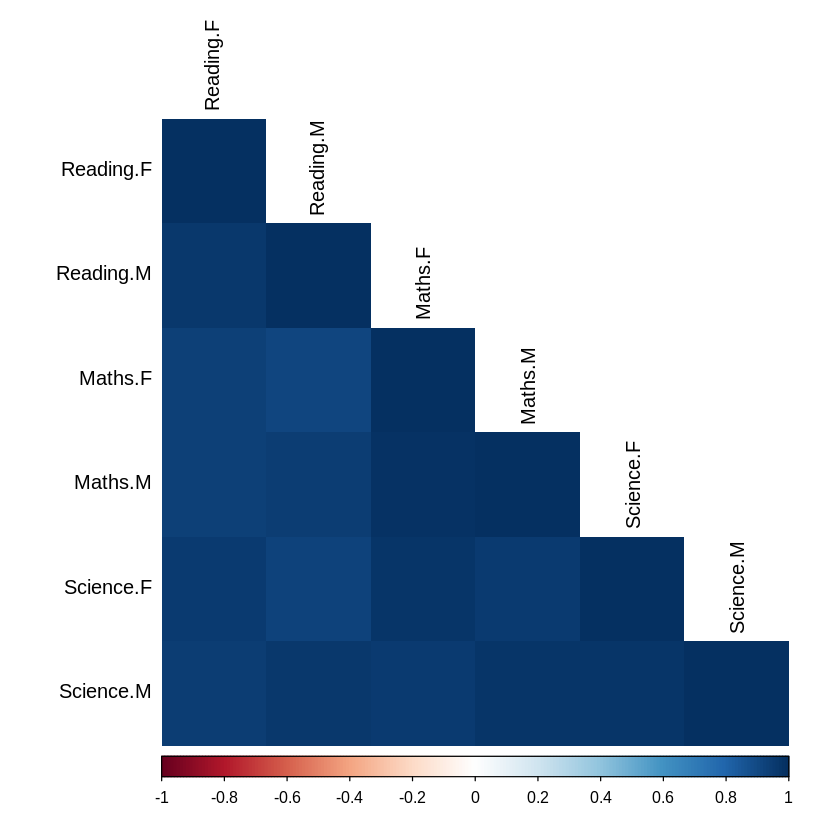

In [36]:
# Visualizando correlação com base na matriz de correlação
corrplot(m_corr, order = "hclust", type = 'lower', tl.col = "black", method = 'shade')